# Contract Awards by  the Centers for Medicare and Medicaid Services (CMS)
The dataset comes from https://www.usaspending.gov/#/download_center/custom_award_data using filters to select all Prime Awards types, Agency = Department of Health and Human Services, Sub Agency = Centers for Medicare and Medicaid Services, by All Recipient Location, by Action Date, for FY 2019. 
## Data on Health and Human Services (HHS) CMS' contract awards for fiscal year (FY) 2019.
In the spirit of transparency and full disclosure, the www.usaspending.gov site includes information about how federal dollars have been spent. Tools on the site allow members of the public to access data sets for their own evaluation or to filter and visualize data online. I am interested in seeing statistics about the contract awards in FY 2019, especially to see which contract award types garner the highest dollar awards, which types of work have the most number of proposals received (and which ones do not receive multiple proposals), and which award recipients came away with the biggest wins.

In [42]:
import os
os.getcwd() # gives the path of the current working directory (cwd)


'/content'

In [43]:
import numpy as np
import pandas as pd
#contracts = pd.read_csv('C:\\Users\\Jennifer\\Downloads\\FY2019HHSContractAwards.csv') # This reads in my csv file.
contracts = pd.read_csv('/FY2019HHSContractAwards.csv')
contracts.head() # This lists the first 5 rows of the dataframe with all of the columns (276).

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,63,159,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,...,planning_commission,port_authority,transit_authority,subchapter_scorporation,limited_liability_corporation,foreign_owned,for_profit_organization,nonprofit_organization,other_not_for_profit_organization,the_ability_one_program,private_university_or_college,state_controlled_institution_of_higher_learning,1862_land_grant_college,1890_land_grant_college,1994_land_grant_college,minority_institution,historically_black_college,tribal_college,alaskan_native_servicing_institution,native_hawaiian_servicing_institution,school_of_forestry,veterinary_college,dot_certified_disadvantage,self_certified_small_disadvantaged_business,small_disadvantaged_business,c8a_program_participant,historically_underutilized_business_zone_hubzone_firm,sba_certified_8a_joint_venture,highly_compensated_officer_1_name,highly_compensated_officer_1_amount,highly_compensated_officer_2_name,highly_compensated_officer_2_amount,highly_compensated_officer_3_name,highly_compensated_officer_3_amount,highly_compensated_officer_4_name,highly_compensated_officer_4_amount,highly_compensated_officer_5_name,highly_compensated_officer_5_amount,usaspending_permalink,last_modified_date
0,7530_7530_HHSM500T0016_P00004_HHSM500201400034I_0,CONT_AWD_HHSM500T0016_7530_HHSM500201400034I_7530,HHSM500T0016,P00004,0.0,7530.0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,HHSM500201400034I,0,0.0,7235573.0,0.0,7235573.0,0.0,17018944.0,10/10/2018,2019,10/10/2018 0:00,5/17/2019 0:00,5/17/2023 0:00,NaN,NaN,75,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),7530,CENTERS FOR MEDICARE AND MEDICAID SERVICES,75FCMC,OFC OF ACQUISITION AND GRANTS MGMT,75,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),7530,CENTERS FOR MEDICARE AND MEDICAID SERVICES,75FCMC,OFC OF ACQUISITION AND GRANTS MGMT,075-X-0522-000,075-0522,X,NOT APPLICABLE,NaN,NaN,...,f,f,f,t,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,PAUL DECKER,853824.0,DEBORAH REED,405673.0,CHRISTOPHER TRENHOLM,382845.0,LISA SCHWARTZ,378414.0,ADAM COYNE,376235.0,https://www.usaspending.gov/#/award/CONT_AWD_H...,10/18/2018 14:51
1,7530_7530_HHSM500T0011_P00007_HHSM500200400007I_0,CONT_AWD_HHSM500T0011_7530_HHSM500200400007I_7530,HHSM500T0011,P00007,0.0,7530.0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,HHSM500200400007I,0,10152351.0,37419683.7,10152351.0,37419683.7,1681830.0,46005307.9,7/17/2019,2019,7/17/2019 0:00,8/31/2020 0:00,8/31/2020 0:00,NaN,NaN,75,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),7530,CENTERS FOR MEDICARE AND MEDICAID SERVICES,75FCMC,OFC OF ACQUISITION AND GRANTS MGMT,75,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),7530,CENTERS FOR MEDICARE AND MEDICAID SERVICES,75FCMC,OFC OF ACQUISITION AND GRANTS MGMT,075-2012/2017-0511-000;075-2014/2019-0511-000;...,075-0511;075-8393,X,NOT APPLICABLE,NaN,NaN,...,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/#/award/CONT_AWD_H...,7/17/2019 15:30
2,7530_7530_HHSM500T0016_P00006_HHSM500201400034I_0,CONT_AWD_HHSM500T0016_7530_HHSM500201400034I_7530,HH

In [44]:
contracts.shape

(3787, 276)

My dataframe has 3,787 rows with 276 columns. 

In [0]:
# This was a first attempt to subset the dataframe but this isn't what I really wanted.
# Implicit index with iloc #before comma is the rows and after comma is columns, with the ends excluded.
# df1.iloc[:2,:1 ]

#contracts_short = contracts.iloc[:,:6] #this pulls all the rows but only the first 5 columns. 
#I want to skip around and pull different columns.
#contracts_short.head()

In [46]:
#dataframe.filter([items,like,regex,axis])
# This filter command makes a subset of the dataframe with only the 19 variables/columns that I am interested in. 

contracts_short = contracts.filter(['contract_transaction_unique_key','parent_award_agency_name','total_dollars_obligated','base_and_exercised_options_value','action_date','period_of_performance_start_date','funding_sub_agency_name','recipient_name','recipient_doing_business_as_name','recipient_state_code','type_of_contract_pricing','product_or_service_code_description','naics_description','solicitation_procedures','type_of_set_aside','number_of_offers_received','multi_year_contract','veteran_owned_business','service_disabled_veteran_owned_business'])
contracts_short.head() # typed the individual column names to pull these into the smaller df called contracts_short

,contract_transaction_unique_key,parent_award_agency_name,total_dollars_obligated,base_and_exercised_options_value,action_date,period_of_performance_start_date,funding_sub_agency_name,recipient_name,recipient_doing_business_as_name,recipient_state_code,type_of_contract_pricing,product_or_service_code_description,naics_description,solicitation_procedures,type_of_set_aside,number_of_offers_received,multi_year_contract,veteran_owned_business,service_disabled_veteran_owned_business
0,7530_7530_HHSM500T0016_P00004_HHSM500201400034I_0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,7235573.0,0.0,10/10/2018,10/10/2018 0:00,CENTERS FOR MEDICARE AND MEDICAID SERVICES,"MATHEMATICA POLICY RESEARCH, INC.",NaN,DC,COST PLUS FIXED FEE,SUPPORT- PROFESSIONAL: OTHER,RESEARCH AND DEVELOPMENT IN THE SOCIAL SCIENCE...,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,NaN,6.0,YES,f,f
1,7530_7530_HHSM500T0011_P00007_HHSM500200400007I_0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,37419683.7,10152351.0,7/17/2019,7/17/2019 0:00,CENTERS FOR MEDICARE AND MEDICAID SERVICES,"MAXIMUS FEDERAL SERVICES, INC.","MAXIMUS FEDERAL SERVICES, INC",VA,FIRM FIXED PRICE,SUPPORT- PROFESSIONAL: OTHER,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,NaN,2.0,NO,f,f
2,7530_7530_HHSM500T0016_P00006_HHSM500201400034I_0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,10665835.0,3430262.0,5/20/2019,5/18/2019 0:00,CENTERS FOR MEDICARE AND MEDICAID SERVICES,"MATHEMATICA POLICY RESEARCH, INC.",NaN,DC,COST PLUS FIXED FEE,SUPPORT- PROFESSIONAL: OTHER,RESEARCH AND DEVELOPMENT IN THE SOCIAL SCIENCE...,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,NaN,6.0,YES,f,f
3,7530_4732_HHSM500201700031G_P00006_GS35F328DA_0,FEDERAL ACQUISITION SERVICE,1807366.0,575305.0,3/13/2019,4/15/2019 0:00,CENTERS FOR MEDICARE AND MEDICAID SERVICES,"ICF INCORPORATED, L.L.C.",NaN,VA,FIRM FIXED PRICE,SUPPORT- PROFESSIONAL: TECHNOLOGY SHARING/UTIL...,CUSTOM COMPUTER PROGRAMMING SERVICES,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,NaN,1.0,NaN,f,f
4,7530_7530_75FCMC19F0002_0_HHSM500201600051I_0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,1314346.8,1314346.8,3/28/2019,3/28/2019 0:00,CENTERS FOR MEDICARE AND MEDICAID SERVICES,CORMAC CORPORATION,NaN,VA,FIRM FIXED PRICE,IT AND TELECOM- SYSTEMS ANALYSIS,COMPUTER SYSTEMS DESIGN SERVICES,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,NaN,3.0,YES,f,f


In [47]:
contracts_short.shape # This gives me the number of (rows, columns) in my shortened dataframe.

(3787, 19)

In [48]:
contracts_short.dtypes # This gives the data type for each variable (column).

contract_transaction_unique_key             object
parent_award_agency_name                    object
total_dollars_obligated                    float64
base_and_exercised_options_value           float64
action_date                                 object
period_of_performance_start_date            object
funding_sub_agency_name                     object
recipient_name                              object
recipient_doing_business_as_name            object
recipient_state_code                        object
type_of_contract_pricing                    object
product_or_service_code_description         object
naics_description                           object
solicitation_procedures                     object
type_of_set_aside                           object
number_of_offers_received                  float64
multi_year_contract                         object
veteran_owned_business                      object
service_disabled_veteran_owned_business     object
dtype: object

The subset dataframe has different kinds of variables. 
The dataframe has strings, boolean (y/n and t/f), numeric, and date values. 

In [49]:
contracts_short.describe() # Describe gives the stats for the numeric columns.

,total_dollars_obligated,base_and_exercised_options_value,number_of_offers_received
count,3.787000e+03,3.366000e+03,3574.000000
mean,5.174034e+07,2.181596e+06,10.813374
std,2.118453e+08,1.378403e+07,28.010666
min,0.000000e+00,-2.568251e+07,0.000000
25%,6.567154e+05,0.000000e+00,1.000000
50%,4.080377e+06,0.000000e+00,3.000000
75%,1.898408e+07,9.271977e+05,5.750000
max,4.298741e+09,5.497525e+08,160.000000


In [50]:
contracts_short.describe(include="all") # This gives stats/counts on the non-numeric column types, too.

,contract_transaction_unique_key,parent_award_agency_name,total_dollars_obligated,base_and_exercised_options_value,action_date,period_of_performance_start_date,funding_sub_agency_name,recipient_name,recipient_doing_business_as_name,recipient_state_code,type_of_contract_pricing,product_or_service_code_description,naics_description,solicitation_procedures,type_of_set_aside,number_of_offers_received,multi_year_contract,veteran_owned_business,service_disabled_veteran_owned_business
count,3787,2470,3.787000e+03,3.366000e+03,3787,3787,3787,3787,195,3778,3787,3787,3782,3776,1710,3574.000000,2690,3787,3787
unique,3787,8,NaN,NaN,269,332,1,664,30,46,10,115,89,7,9,NaN,2,2,2
top,7530_4732_HHSM500201600060G_P00009_GS35F128BA_0,CENTERS FOR MEDICARE AND MEDICAID SERVICES,NaN,NaN,9/12/2019,2/1/2019 0:00,CENTERS FOR MEDICARE AND MEDICAID SERVICES,THE MITRE CORPORATION,EDS,VA,FIRM FIXED PRICE,SUPPORT- PROFESSIONAL: OTHER,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...,SUBJECT TO MULTIPLE AWARD FAIR OPPORTUNITY,NO SET ASIDE USED.,NaN,NO,f,f
freq,1,1335,NaN,NaN,61,71,3787,95,29,1096,1600,1340,727,2294,1043,NaN,1764,3601,3653
mean,NaN,NaN,5.174034e+07,2.181596e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.813374,NaN,NaN,NaN
std,NaN,NaN,2.118453e+08,1.378403e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.010666,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,-2.568251e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,6.567154e+05,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,4.080377e+06,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,1.898408e+07,9.271977e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.750000,NaN,NaN,NaN


In [51]:
print(contracts_short) #this shows me the first and last 5 rows
type(contracts_short)

                        contract_transaction_unique_key  ... service_disabled_veteran_owned_business
0     7530_7530_HHSM500T0016_P00004_HHSM500201400034I_0  ...                                       f
1     7530_7530_HHSM500T0011_P00007_HHSM500200400007I_0  ...                                       f
2     7530_7530_HHSM500T0016_P00006_HHSM500201400034I_0  ...                                       f
3       7530_4732_HHSM500201700031G_P00006_GS35F328DA_0  ...                                       f
4         7530_7530_75FCMC19F0002_0_HHSM500201600051I_0  ...                                       f
...                                                 ...  ...                                     ...
3782        7530_4730_75FCMC18F0065_P00001_GS07F9186S_0  ...                                       f
3783      7530_-NONE-_HHSM500201700020P_P00001_-NONE-_0  ...                                       f
3784               7530_-NONE-_75FCMC19C0004_0_-NONE-_0  ...                               

pandas.core.frame.DataFrame

My variable total_dollars_obligated does not have any na's but just to be sure I will remove them.

In [52]:
#data_na = (data.dropna(subset=['Tax Returns']))
contracts_short_na = (contracts_short.dropna(subset=['total_dollars_obligated'])) #this removes the records that have na's in this variable.
print(contracts_short_na)
type(contracts_short_na)

                        contract_transaction_unique_key  ... service_disabled_veteran_owned_business
0     7530_7530_HHSM500T0016_P00004_HHSM500201400034I_0  ...                                       f
1     7530_7530_HHSM500T0011_P00007_HHSM500200400007I_0  ...                                       f
2     7530_7530_HHSM500T0016_P00006_HHSM500201400034I_0  ...                                       f
3       7530_4732_HHSM500201700031G_P00006_GS35F328DA_0  ...                                       f
4         7530_7530_75FCMC19F0002_0_HHSM500201600051I_0  ...                                       f
...                                                 ...  ...                                     ...
3782        7530_4730_75FCMC18F0065_P00001_GS07F9186S_0  ...                                       f
3783      7530_-NONE-_HHSM500201700020P_P00001_-NONE-_0  ...                                       f
3784               7530_-NONE-_75FCMC19C0004_0_-NONE-_0  ...                               

pandas.core.frame.DataFrame

Since my number of rows did not change (3787) I know that no records were removed due to na's. 


I will continue with some exploratory data analysis (EDA) using matplotlib. 

In [0]:
# This didn't work out quite as planned so i've abandoned this method.
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#x = np.random.randn(1000)
#plt.hist(x); # or 
#plt.hist(x, bins=30,normed=True,alpha=0.5,histtype='stpfilled',color='steelblue',edgecolor='none');

#offers = contracts_short.filter(['number_of_offers_received'])
#offers = offers.fillna(0)
#offers = contracts_short.pd('number_of_offers_received')
#plt.hist(offers)
#plt.show()

This will give me a histogram of the number of offers for each contract. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


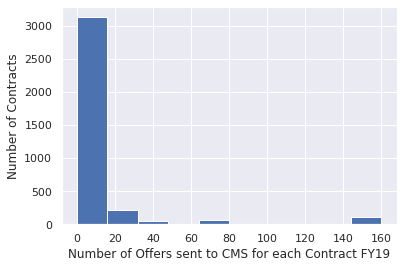

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
_ = plt.hist(contracts_short.number_of_offers_received)
_ = plt.xlabel('Number of Offers sent to CMS for each Contract FY19')
_ = plt.ylabel('Number of Contracts')

I will use seaborn styling to show this histogram again.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


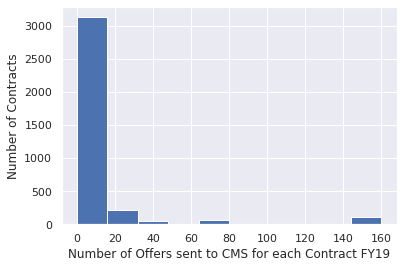

In [55]:
import seaborn as sns
sns.set()
_ = plt.hist(contracts_short.number_of_offers_received)
_ = plt.xlabel('Number of Offers sent to CMS for each Contract FY19')
_ = plt.ylabel('Number of Contracts')

I will make the histogram again but change the bin number. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


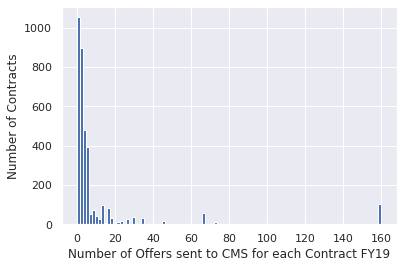

In [56]:
_ = plt.hist(contracts_short.number_of_offers_received, bins=100)
_ = plt.xlabel('Number of Offers sent to CMS for each Contract FY19')
_ = plt.ylabel('Number of Contracts')

This will give me a histogram of the Total Dollars Obligated for the fiscal year.

Text(0, 0.5, 'Number of Contracts')

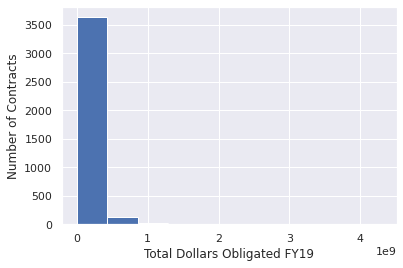

In [57]:
plt.hist(contracts_short.total_dollars_obligated)
plt.xlabel('Total Dollars Obligated FY19')
plt.ylabel('Number of Contracts')


This will give me a histogram of the Total Dollars for the Base Year and already Exercised Options.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number of Contracts')

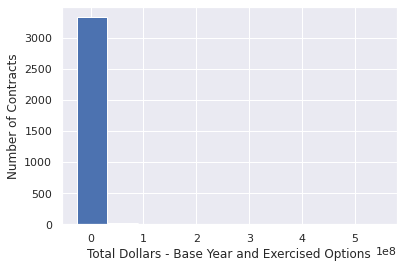

In [58]:
plt.hist(contracts_short.base_and_exercised_options_value)
plt.xlabel('Total Dollars - Base Year and Exercised Options')
plt.ylabel('Number of Contracts')

Going back to the Total Dollars Obligated for the FY19, I will try different bin values to make the histogram reveal more about the data.

Text(0, 0.5, 'Number of Contracts')

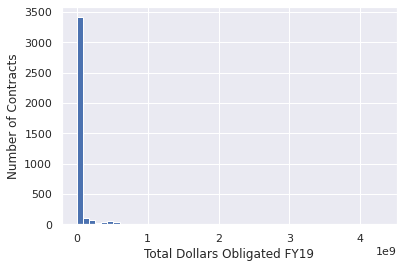

In [59]:
sns.set()
plt.hist(contracts_short.total_dollars_obligated,bins=50)
plt.xlabel('Total Dollars Obligated FY19')
plt.ylabel('Number of Contracts')

# Bootstrapping
I will need to pull just the one variable out. 
I will need to take random samples of my records for the variable_total_dollars obligated and append the samples onto the data. 

In [60]:
#mdtaxrt = data_na['Tax Returns']
#type(mdtaxrt)
obligated = contracts_short['total_dollars_obligated'] # this keeps just the one variable.
print(obligated)
type(obligated)

0        7235573.00
1       37419683.70
2       10665835.00
3        1807366.00
4        1314346.80
           ...     
3782      201018.62
3783       96024.55
3784      537501.00
3785      100806.72
3786        3500.00
Name: total_dollars_obligated, Length: 3787, dtype: float64


pandas.core.series.Series

In [61]:
data_sample = np.random.choice(obligated,size = 100, replace = False) # this is just a random sample of 100 records
np.mean(data_sample) # the mean of my one sample
# replace = False means the values are removed from the dataset as the function picks the random sample

45688438.3838

In [62]:
np.median(data_sample)# the median of my one sample

3965702.815

In [63]:
np.std(data_sample) # the standard deviation of my one sample

132558745.9341674

In [64]:
from sklearn.utils import resample #we use the resample 
n_iterations = 2000

boot_samples = list()
mean_boot_samples = list()
median_boot_samples = list()

for i in range(n_iterations): #this does the bootstrapping
    boot_sample = resample(data_sample)
    boot_samples.append(boot_sample) # this appends the new sample onto the rest
    
    mean_boot_samples.append(np.mean(boot_sample)) #calculates the mean of the sample and appends it to the list
    
    median_boot_samples.append(np.median(boot_sample)) #calculates the median of the sample and appends it to the list
    
print("The Length of the boot_samples is: " + str(len(boot_samples)))
print("The mean of the bootstrapped data is: " + str(np.mean(mean_boot_samples)))
print("The median of the bootstrapped data is: " + str(np.median(median_boot_samples)))


The Length of the boot_samples is: 2000
The mean of the bootstrapped data is: 45622101.7409515
The median of the bootstrapped data is: 3965702.815


In [65]:
np.mean(obligated)
print("The mean of the full dataset is: " + str(np.mean(obligated)))


The mean of the full dataset is: 51740344.17200949


# Confidence Interval for the Median

In [66]:
resamples_medians = pd.Series(index=np.arange(1000))
for i in range(1000): 
              resamples_medians[i] = np.median(resample(data_sample))

print(resamples_medians.median())
print(resamples_medians.mean())
print(resamples_medians.quantile(0.025))
print(resamples_medians.quantile(0.975))

3965702.815
3849543.2602100032
2308179.03
5581517.324999999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [67]:
np.median((obligated))
print("the median of the full dataset is: " + str(np.median(obligated)))


the median of the full dataset is: 4080376.73
